In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Define the paths to the relevant data
raster_directory = '../zhang2011/raster_data/'
object_label_file = '../zhang2011/object_labels.npy'
loc_label_file = '../zhang2011//loc_labels.npy'
        

In [3]:
#Let's load data from a single neuron, and the two label files

raster_array = np.load(raster_directory + 'raster1.npy')
object_labels = np.load(object_label_file)
loc_labels = np.load(loc_label_file)

print(raster_array.shape, object_labels.shape, loc_labels.shape)

def get_neuron_dat(raster_dir, neuron_ind):
    raster_arr = np.load(raster_dir + 'raster'+str(neuron_ind) + '.npy')

(420, 1000) (420,) (420,)


In [4]:

print(raster_array[0:10, 0:10], object_labels[0:10], loc_labels[0:10])

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] ['car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car'] ['lower' 'lower' 'lower' 'lower' 'lower' 'lower' 'lower' 'lower' 'lower'
 'lower']


The object labels and location labels are quite long and visualizing the first 10 labels does not tell us what all the unique objects and locations are. To do so we can use a numpy function called np.unique(). What are the unique objects and labels? 

In [5]:
print(np.unique(object_labels), np.unique(loc_labels))

['car' 'couch' 'face' 'flower' 'guitar' 'hand' 'kiwi'] ['lower' 'middle' 'upper']


There are 60 trials of each object each 1000ms long. These trials correspond to IT neural responses toobject presented at 3 different locations in the visual scene (each 20 trials). There are 7 objects for a total of 420 trials. Let's visualize all these trials. 

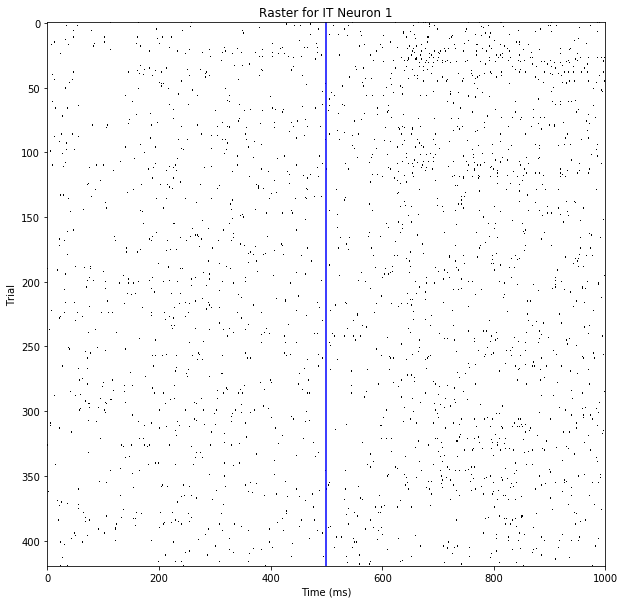

In [6]:
#Plotting a raster
#Stimulus turns on at 500ms
plt.figure(figsize=(10,10))
plt.imshow(raster_array, cmap='gray_r', aspect='auto')
plt.ylabel('Trial')
plt.xlabel('Time (ms)')
plt.title('Raster for IT Neuron 1')
#Show when the stimulus comes on
plt.axvline(x=500, color = 'b')
plt.show()

#Let's put this into a function
def plot_raster(raster_array, title=None):
    plt.figure(figsize=(10,10))
    plt.imshow(raster_array, cmap='gray_r', aspect='auto')
    plt.ylabel('Trial')
    plt.xlabel('Time (ms)')
    plt.title(title)
    #Show when the stimulus comes on
    plt.axvline(x=500, color = 'b')
    plt.show()


A common problem in dataset analysis is to compute basic information about your data (like how many trials of each category exist..). For this data calculate how many times each object appears and how many times each location is presented for each object. For example, for the "car" calculate how many cars there are and how many times there is 'car' and 'lower', 'car' and 'upper' etc.

In [7]:
unique_objects = np.unique(object_labels)
unique_locations = np.unique(loc_labels)


#Here we show 3 different ways to do the exact same thing
print('Method 1 implementation .... ')
for obj in unique_objects:
    for loc in unique_locations:
        #Method 1
        n_times = sum(object_labels[i] == obj and loc_labels[i] == loc for i in range(len(object_labels)))
        print("Number of times", obj, " and ", loc, ": ", n_times) 

print('Method 2 implementation...')
for obj in unique_objects:
    for loc in unique_locations:
        #Method 2
        n_times = 0
        for i in range(len(object_labels)):
            if object_labels[i] == obj and loc_labels[i] == loc:
                n_times += 1
        print("Number of times", obj, " and ", loc, ": ", n_times) 

print('Method 3 implementation ...')
for obj in unique_objects:
    for loc in unique_locations:
        #Method 3
        n_times = sum(loc_labels[object_labels == obj] == loc)
        print("Number of times", obj, " and ", loc, ": ", n_times) 

Method 1 implementation .... 
Number of times car  and  lower :  20
Number of times car  and  middle :  20
Number of times car  and  upper :  20
Number of times couch  and  lower :  20
Number of times couch  and  middle :  20
Number of times couch  and  upper :  20
Number of times face  and  lower :  20
Number of times face  and  middle :  20
Number of times face  and  upper :  20
Number of times flower  and  lower :  20
Number of times flower  and  middle :  20
Number of times flower  and  upper :  20
Number of times guitar  and  lower :  20
Number of times guitar  and  middle :  20
Number of times guitar  and  upper :  20
Number of times hand  and  lower :  20
Number of times hand  and  middle :  20
Number of times hand  and  upper :  20
Number of times kiwi  and  lower :  20
Number of times kiwi  and  middle :  20
Number of times kiwi  and  upper :  20
Method 2 implementation...
Number of times car  and  lower :  20
Number of times car  and  middle :  20
Number of times car  and  up

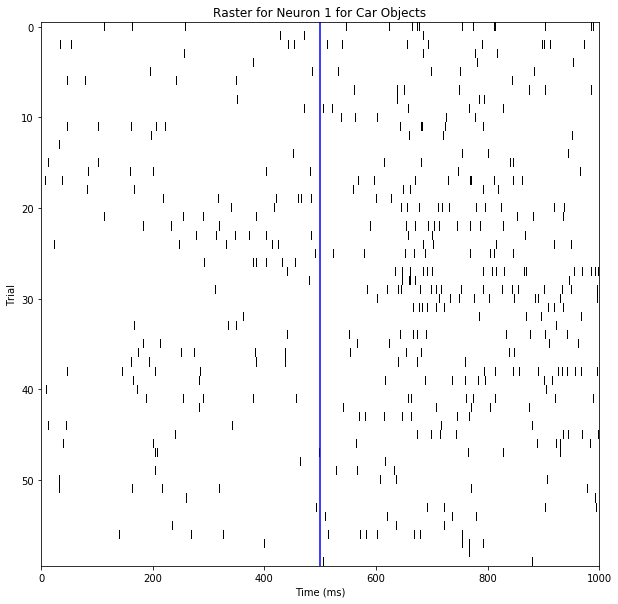

In [8]:
#Now plot the raster for just the trials with the car

indices_car = np.where(object_labels == 'car')
raster_car = raster_array[indices_car]

plot_raster(raster_car, 'Raster for Neuron 1 for Car Objects')

Now we would like to compute the summed spikes for each trial of a "car" object being presentation. This will give us 60 spike counts corresponding to each of the trials. After this we want to compute the mean and standard deviation of this array of summed spike counts. 

In [9]:
#Mean firing rate for each trial 
sum_spikes = raster_car[:,500:].sum(axis=1)
mean_spikes = sum_spikes.mean()
std_spikes = sum_spikes.std()
print(sum_spikes, mean_spikes, std_spikes)

[15  1 10  6  7  9  3 13  7 11  9  7  5  2  5  8  2 15  8  5 17  6 17  7
  6 18  2 24  9 27 21 18  6  5 15  7  8  6 19 17  4 10 11  8  3 11 12  5
  4  3  5  2  2 11  6  4 12  5  4  3] 8.8 5.841803374529707


Now we are going to plot a tuning curve. What this means, is for each object (or location) we would like to calculate the mean number of spikes fired for that object. We then want to bar plot this for the 7 objects (and then the 3 locations). We will write a function to do this that takes in a label list and the data array and calculates a tuning curve for those labels. 

In [10]:
def calc_tuning_curve(data,labels):
    tuning_curve_means = []
    tuning_curve_std = []
    for label in np.unique(labels):
        label_arr = data[labels == label]
        sum_spike = label_arr.sum(axis=1)
        tuning_curve_means.append(sum_spike.mean())
        tuning_curve_std.append(sum_spike.std())
    
    return [tuning_curve_means, tuning_curve_std]

tuning_curve_object = calc_tuning_curve(raster_array[:,0:500], object_labels)
tuning_curve_loc = calc_tuning_curve(raster_array[:,0:500], loc_labels)
print(tuning_curve_object, tuning_curve_loc)

[[3.683333333333333, 3.7, 3.6333333333333333, 3.8666666666666667, 3.066666666666667, 2.8333333333333335, 3.55], [2.39089708872818, 2.2752289262108696, 2.6892791268706606, 2.9181424837652385, 2.400462918318511, 2.402544946972319, 2.4523797965785534]] [[3.35, 3.585714285714286, 3.492857142857143], [2.3174031032293763, 2.5911544980284487, 2.681940738056861]]


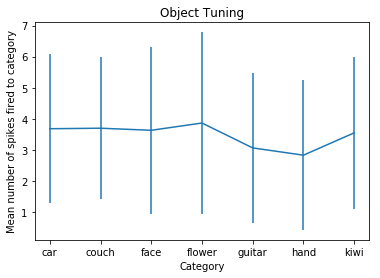

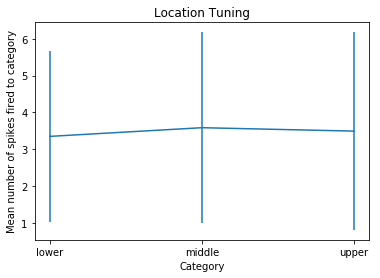

In [11]:
def plot_tuning_curve(tuning_curve, labels, title = None):
    y = tuning_curve[0]
    x = list(range(len(y)))
    error = tuning_curve[1]
    plt.figure()
    plt.errorbar(x,y, error)
    plt.title(title)
    plt.xticks(x, labels)
    plt.ylabel('Mean number of spikes fired to category')
    plt.xlabel('Category')
    plt.show()
    
plot_tuning_curve(tuning_curve_object, unique_objects, title = 'Object Tuning')
plot_tuning_curve(tuning_curve_loc, unique_locations, title = 'Location Tuning')

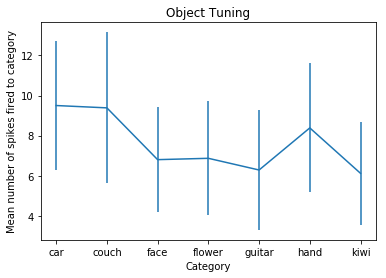

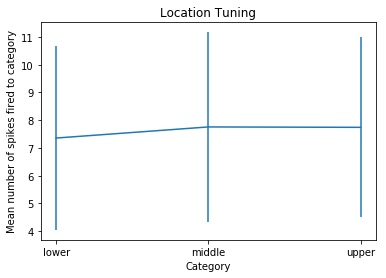

In [12]:
def run_tuning_analysis(raster_directory, neuron_number, object_labels, loc_labels):
    raster_array = np.load(raster_directory + 'raster' + str(neuron_number) + '.npy')
    
    tuning_curve_object = calc_tuning_curve(raster_array[:,500:], object_labels)
    tuning_curve_loc = calc_tuning_curve(raster_array[:,500:], loc_labels)
    
    unique_objects = np.unique(object_labels)
    unique_labels = np.unique(loc_labels)
    
    plot_tuning_curve(tuning_curve_object, unique_objects, title = 'Object Tuning')
    plot_tuning_curve(tuning_curve_loc, unique_locations, title = 'Location Tuning')
    


neuron_number = 110

run_tuning_analysis(raster_directory, neuron_number, object_labels, loc_labels)